In [5]:
!pip install numpy opencv-python scikit-learn matplotlib

  Using cached matplotlib-3.10.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp311-cp311-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl (254 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp311-cp311-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1-p

In [22]:
!pip install scikit-image seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
data_dir = "/Users/soardr/Desktop/VR Assign 2/data"
categories = ["with_mask", "without_mask"]
images = []
labels = []

In [9]:
for label, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))  # Resize for uniformity
        images.append(img)
        labels.append(label)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [10]:
images = np.array(images)
labels = np.array(labels)

### HoG features

In [17]:
features = []
for img in images:
    hog_feature = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9)
    features.append(hog_feature)

features = np.array(features)

In [25]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

### Canny Edge features

In [30]:
def extract_edge_features(image):
    edges = cv2.Canny(image, 50, 150)
    return np.histogram(edges.ravel(), bins=256, density=True)[0]

In [35]:
canny_feats = []
for image in images:
    canny_edge_feats = extract_edge_features(image)
    canny_feats.append(canny_edge_feats)

canny_feats = np.array(canny_feats)

# for HoG

## Models

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM Classifier

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.4f}")

SVM Accuracy: 0.8681


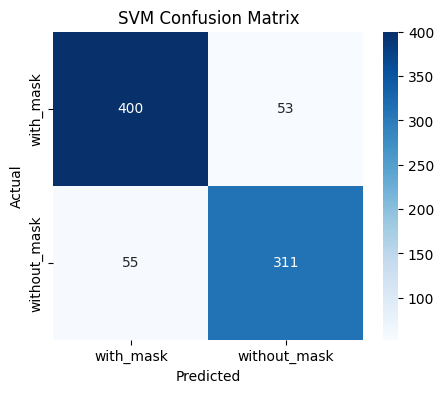

In [26]:
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")

### MLP Classifier

In [20]:
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
nn_acc = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_acc:.4f}")

Neural Network Accuracy: 0.9316


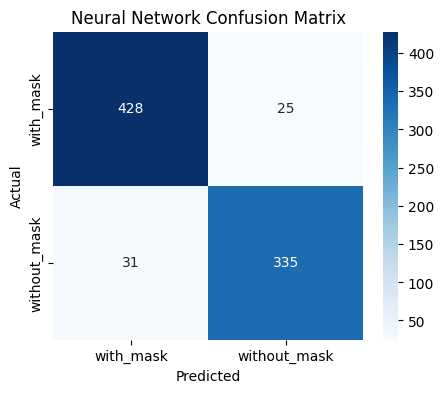

In [27]:
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network Confusion Matrix")

## Comparison

In [29]:
print("\nClassifier Comparison:")
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Neural Network Accuracy: {nn_acc:.4f}")


Classifier Comparison:
SVM Accuracy: 0.8681
Neural Network Accuracy: 0.9316


# for Canny Edge

In [38]:
X_train_canny, X_test_canny, y_train_canny, y_test_canny = train_test_split(canny_feats, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_canny = scaler.fit_transform(X_train_canny)
X_test_canny = scaler.transform(X_test_canny)

### SVM Classifier

In [39]:
svm_model_canny = SVC(kernel='linear')
svm_model_canny.fit(X_train_canny, y_train_canny)
y_pred_canny_svm = svm_model_canny.predict(X_test_canny)
svm_acc_canny = accuracy_score(y_test_canny, y_pred_canny_svm)
print(f"SVM Accuracy Canny: {svm_acc_canny:.4f}")

SVM Accuracy Canny: 0.5140


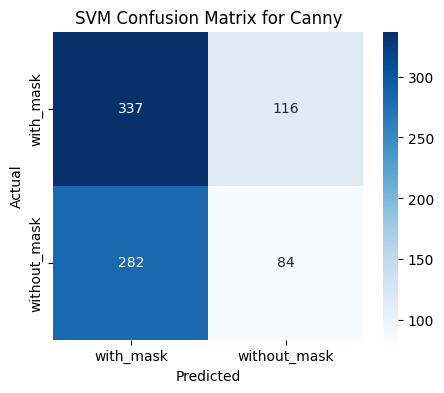

In [40]:
plot_confusion_matrix(y_test_canny, y_pred_canny_svm, "SVM Confusion Matrix for Canny")

### MLP Classifier

In [41]:
nn_model_canny = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
nn_model_canny.fit(X_train_canny, y_train_canny)
y_pred_nn_canny = nn_model_canny.predict(X_test_canny)
nn_acc_canny = accuracy_score(y_test_canny, y_pred_nn_canny)
print(f"Neural Network Accuracy Canny: {nn_acc_canny:.4f}")

Neural Network Accuracy Canny: 0.5385


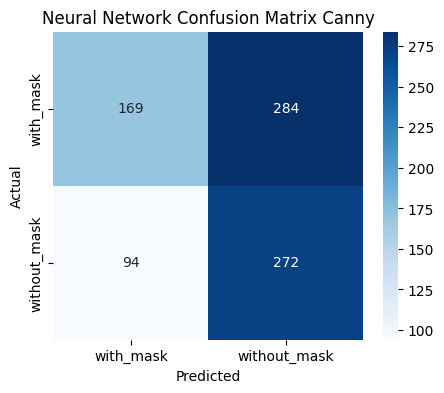

In [42]:
plot_confusion_matrix(y_test_canny, y_pred_nn_canny, "Neural Network Confusion Matrix Canny")